# Predicting the winner of the 2018 FIFA World Cup
**Aim**: 
to predict the outcome of the FIFA World Cup 2018
UPDATE: see the simulation of the single elimination phase here: https://www.kaggle.com/agostontorok/winner-of-the-fifa-world-cup-10-000-simulations 

 **Method**:
- Use data from Kaggle to model the outcome of certain pairings between teams, given their rank, points, and the weighted point difference with the opponent.
- Use this model to predict the outcome of the group rounds and then the single-elimination phase

**Summary**
According to the analysis below, the team that will win the World Cup is the [underdog according to the bookies](https://www.oddschecker.com/football/world-cup/winner): Germany . But this is not the only interesting thing you can observe. If [not interested in the data munging part](https://ih1.redbubble.net/image.441592463.7099/sticker,375x360-bg,ffffff.u1.png) head to the last section (Visualization) and see the single-elimination phase. To make the story more interesting for the sport lovers, I report fair odds (i.e. fair market, without bookmaker margin) instead of the raw probability output. 

Couple things to note, 
- it seems Egypt qualifies to the best 16 and their match with Portugal is the safest bet in the phase. 
- In this simulation, Brasil cannot make it through Belgium.. I'm sure here many would consider otherwise
- It seems that neither CRonaldo (POR) nor LMessi (ARG) is going to play in the final but they are going to play against each other in the quarterfinals...

All in all, I'm looking forward to the tournament! Place your bets and get ready you too! 

Cheers!

# Data I/O

I use three datasets
- FIFA rankings from 1993 to 2018 (courtesy of [Tadhg Fitzgerald](https://www.kaggle.com/tadhgfitzgerald) 
> This one I used to get the FIFA ranking and points for the teams, which is a monthly changing rank previously shown as a [decent predictor](http://www.sportingintelligence.com/2014/06/20/upsets-giant-killings-adios-bye-bye-fifa-rankings-still-ahead-in-predicting-results-200601/) of team performance
- International Soccer matches from 1872 to 2018 (courtesy of [Mart Jürisoo](https://www.kaggle.com/martj42))
> This I will use to find out how much the difference in point, ranks and the current rank of the team affects the outocme of a match
- FIFA World Cup 2018 data set (courtesy of [Nuggs](https://www.kaggle.com/ahmedelnaggar))
> This I will use to get the upcoming matches 

Comment: Right when reading the datafiles I take care of the renaming of the Countries because there is some mismatch in the sources

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

rankings = pd.read_csv('fifa_ranking.csv')
rankings = rankings.loc[:,['rank', 'country_full', 'country_abrv', 'cur_year_avg_weighted', 'rank_date', 
                           'two_year_ago_weighted', 'three_year_ago_weighted']]
rankings = rankings.replace({"IR Iran": "Iran"})
rankings['weighted_points'] =  rankings['cur_year_avg_weighted'] + rankings['two_year_ago_weighted'] + rankings['three_year_ago_weighted']
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])

matches = pd.read_csv('results.csv')
matches =  matches.replace({'Germany DR': 'Germany', 'China': 'China PR'})
matches['date'] = pd.to_datetime(matches['date'])

world_cup0 = pd.read_csv('World Cup 2018 Dataset.csv')
# # A=['A','Qatar', 'Ecuador', 'Senegal' , 'Netherlands']
# # B=['B','England', 'IR Iran', 'USA' , 'Wales']
# # C=['C','Argentina', 'Saudi Arabia', 'Mexico', 'Poland']
# # D=['D','France', 'Australia', 'Denmark' , 'Tunisia' ]
# # E=['E','Spain', 'Costa Rica', 'Germany' , 'Japan']
# # F=['F','Belgium', 'Canada', 'Morocco' , 'Croatia']
# # G=['G','Brazil', 'Serbia', 'Switzerland' , 'Cameroon' ]
# # H=['H','Portugal', 'Ghana', 'Uruguay' , 'Korea Republic' ]



world_cup0 = world_cup0.loc[:, ['Team', 'Group', 'First match against', 'Second match against', 'Third match against']]


world_cup0 = world_cup0.replace({"IRAN": "Iran", 
                                "Costarica": "Costa Rica", 
                                "Porugal": "Portugal", 
                                "Columbia": "Colombia", 
                                "Korea" : "Korea Republic"})

world_cup0.head

world_cup0 = world_cup0.set_index('Team')
world_cup0.to_csv('oldwc.csv')

world_cup=pd.read_csv('wc22.csv')
world_cup = world_cup.replace({"USA": "United States", })
world_cup

,Team,Group,First match against,Second match against,Third match against,Unnamed: 5
0,Qatar,A,Equador,Senegal,Netherlands,NaN
1,Netherlands,A,Qatar,Equador,Senegal,NaN
2,Senegal,A,Netherlands,Qatar,Equador,NaN
3,Equador,A,Senegal,Netherlands,Qatar,NaN
4,England,B,Iran,United States,Wales,NaN
5,Wales,B,England,Iran,United States,NaN
6,United States,B,Wales,England,Iran,NaN
7,Iran,B,United States,Wales,England,NaN
8,Argentina,C,Saudi Arabia,Mexico,Poland,NaN
9,Poland,C,Argentina,Saudi Arabia,Mexico,NaN


# Feature extraction

I join the matches with the ranks of the different teams. 

Then extract some features:
- point and rank differences
- if the game was for some stakes, because my naive view was that typically friendly matches are harder to predict (TODO differentiate the WC matches from the rest)
- how many days the different teams were able to rest but this turned out to be not important enough to be worth the hassle
- include the participant countries as a one hot vector but that did not appear to be a strong predictor either

In [2]:
# I want to have the ranks for every day 
rankings = rankings.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()

# join the ranks
matches = matches.merge(rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])
matches = matches.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))

In [3]:
matches = matches.loc[:,~matches.columns.duplicated()].copy()


In [3]:
matches['rank_difference'] = matches['rank_home'] - matches['rank_away']
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2
matches['point_difference'] = matches['weighted_points_home'] - matches['weighted_points_away']
matches['score_difference'] = matches['home_score'] - matches['away_score']
matches['is_won'] = matches['score_difference'] > 0 # take draw as lost
matches['is_stake'] = matches['tournament'] != 'Friendly'

# I tried earlier rest days but it did not turn to be useful
#max_rest = 30
#matches['rest_days'] = matches.groupby('home_team').diff()['date'].dt.days.clip(0,max_rest).fillna(max_rest)

# I tried earlier the team as well but that did not make a difference either
matches['wc_participant'] = matches['home_team'] * matches['home_team'].isin(world_cup.index.tolist())
matches['wc_participant'] = matches['wc_participant'].replace({'':'Other'})
matches = matches.join(pd.get_dummies(matches['wc_participant']))

# Modeling

I used a simple Logistic regression, which yielded already rather good performance

c:\Users\LEGION\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


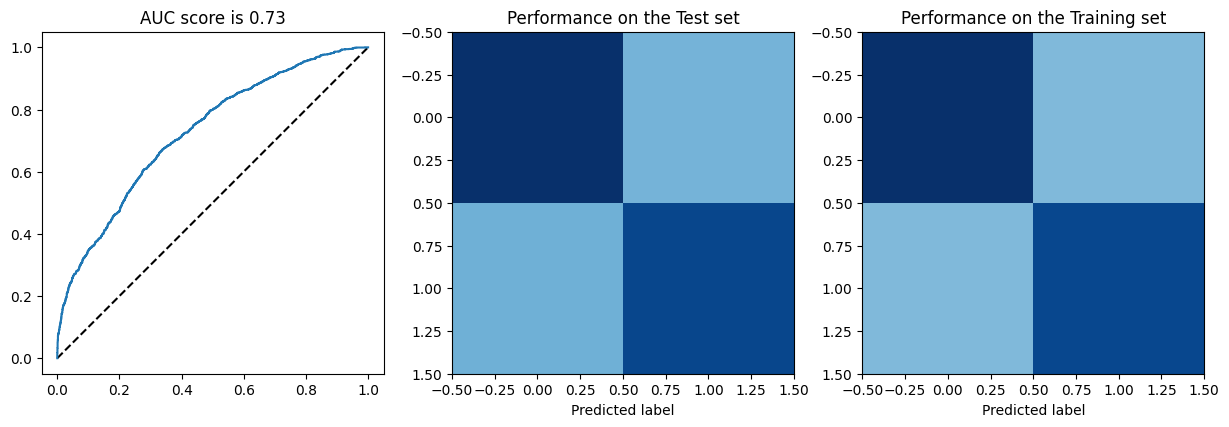

In [11]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = matches.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake']], matches['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

# figures 
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

I consider this pretty good performance, minding that soccer matches have typically only few goals scored and therefore making their outcome even more unpredictable. Nevertheless, let's look at the bad predictions and see where we are making mistakes more often.

Stakes distribution in the wrong predictions
True     0.576795
False    0.423205
Name: is_stake, dtype: float64
Stakes distribution overall
True     0.625664
False    0.374336
Name: is_stake, dtype: float64


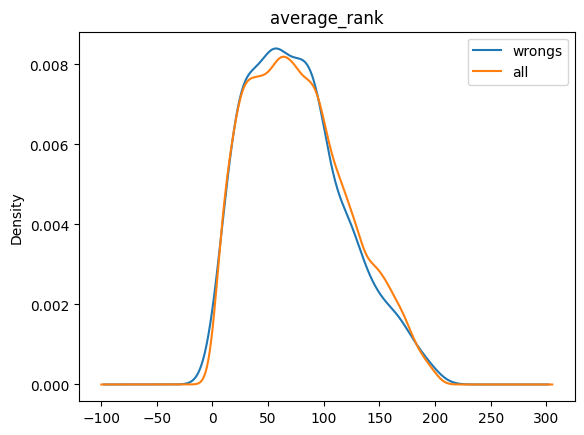

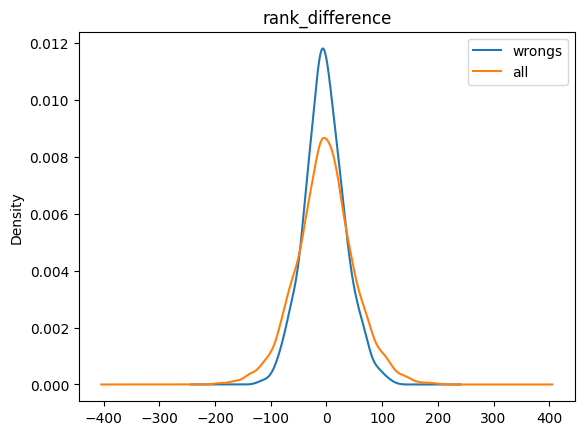

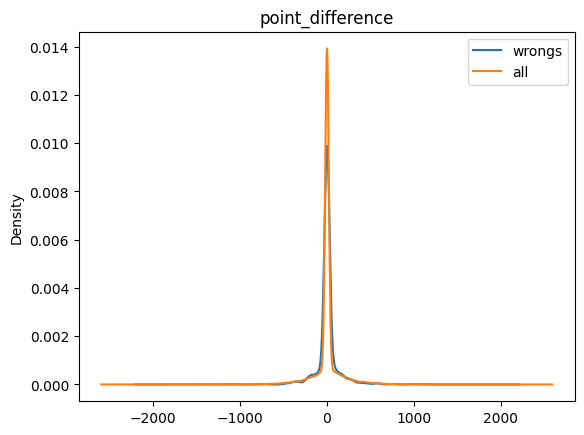

In [12]:
features = ['average_rank', 'rank_difference', 'point_difference']
wrongs = y_test != model.predict(X_test)

for feature in features:
    plt.figure()
    plt.title(feature)
    X_test.loc[wrongs, feature].plot.kde()
    X.loc[:, feature].plot.kde()
    plt.legend(['wrongs', 'all'])
    
print("Stakes distribution in the wrong predictions")
print(X_test.loc[wrongs, 'is_stake'].value_counts() / wrongs.sum())
print("Stakes distribution overall")
print(X['is_stake'].value_counts() / X.shape[0])

From these figures, we read 
- we predict worse for closer ranks
- lower ranks in general
- and somewhat for matches with no stakes (Friendly here)

Luckily, this implies that for the world cup our predicitons may be somewhat even better

# World Cup simulation

## Group rounds

In [13]:
# let's define a small margin when we safer to predict draw then win
margin = 0.05

# let's define the rankings at the time of the World Cup
world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'].max()) & 
                                    rankings['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

In [17]:
world_cup

,Team,Group,First match \nagainst,Second match\n against,Third match\n against,points,total_prob
0,Poland,H,Senegal,Colombia,Japan,7,1.839704
1,Colombia,H,Japan,Poland,Senegal,7,1.711118
2,Senegal,H,Poland,Japan,Colombia,3,1.441010
3,Japan,H,Colombia,Senegal,Poland,0,1.008168
4,Belgium,G,Panama,Tunisia,England,9,1.898023
5,England,G,Tunisia,Panama,Belgium,6,1.734663
6,Tunisia,G,England,Belgium,Panama,3,1.537988
7,Panama,G,Belgium,England,Tunisia,0,0.829326
8,Germany,F,Mexico,Sweden,Korea Republic,9,1.932965
9,Mexico,F,Germany,Korea Republic,Sweden,4,1.562140


In [14]:
from itertools import combinations

opponents = ['First match \nagainst', 'Second match\n against', 'Third match\n against']

world_cup['points'] = 0
world_cup['total_prob'] = 0

for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points
        
        home_win_prob = model.predict_proba(row)[:,1][0]
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob
        
        points = 0
        if home_win_prob <= 0.5 - margin:
            print("{} wins with {:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
        if home_win_prob > 0.5 - margin:
            points = 1
        if home_win_prob >= 0.5 + margin:
            points = 3
            world_cup.loc[home, 'points'] += 3
            print("{} wins with {:.2f}".format(home, home_win_prob))
        if points == 1:
            print("Draw")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1

___Starting group G:___
Belgium vs. Panama: Belgium wins with 0.70
Belgium vs. Tunisia: Belgium wins with 0.62
Belgium vs. England: Belgium wins with 0.59
Panama vs. Tunisia: Tunisia wins with 0.72
Panama vs. England: England wins with 0.76
Tunisia vs. England: England wins with 0.56
___Starting group C:___
France vs. Australia: France wins with 0.64
France vs. Peru: Draw
France vs. Denmark: Draw
Australia vs. Peru: Peru wins with 0.67
Australia vs. Denmark: Denmark wins with 0.72
Peru vs. Denmark: Denmark wins with 0.56
___Starting group D:___
Argentina vs. Iceland: Argentina wins with 0.60
Argentina vs. Croatia: Argentina wins with 0.60
Argentina vs. Nigeria: Argentina wins with 0.68
Iceland vs. Croatia: Draw
Iceland vs. Nigeria: Iceland wins with 0.60
Croatia vs. Nigeria: Croatia wins with 0.61
___Starting group H:___
Poland vs. Senegal: Poland wins with 0.60
Poland vs. Colombia: Draw
Poland vs. Japan: Poland wins with 0.70
Senegal vs. Colombia: Colombia wins with 0.58
Senegal vs. J

## Single-elimination rounds

In [15]:
pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'weighted_points']
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'weighted_points']
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model.predict_proba(row)[:,1][0]
        if model.predict_proba(row)[:,1] <= 0.5:
            print("{0} wins with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        else:
            print("{0} wins with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Uruguay vs. Spain: Spain wins with probability 0.54
Denmark vs. Croatia: Denmark wins with probability 0.57
Brazil vs. Mexico: Brazil wins with probability 0.58
Belgium vs. Colombia: Belgium wins with probability 0.61
Egypt vs. Portugal: Portugal wins with probability 0.83
France vs. Argentina: Argentina wins with probability 0.54
Switzerland vs. Germany: Germany wins with probability 0.67
England vs. Poland: Poland wins with probability 0.52


___Starting of the quarterfinal___
Spain vs. Denmark: Denmark wins with probability 0.53
Brazil vs. Belgium: Belgium wins with probability 0.53
Portugal vs. Argentina: Portugal wins with probability 0.53
Germany vs. Poland: Germany wins with probability 0.62


___Starting of the semifinal___
Denmark vs. Belgium: Belgium wins with probability 0.57
Portugal vs. Germany: Germany wins with probability 0.60


___Starting of the final___
Belgium vs. Germany: Germany wins with probability 0.58




# Let's see a visualization 

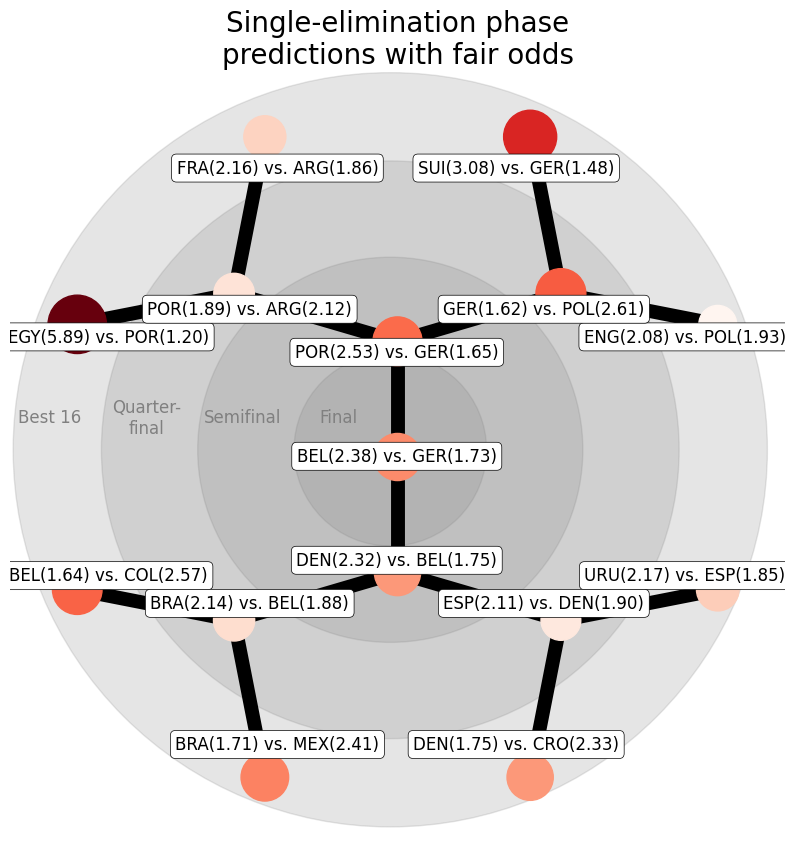

In [16]:
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

node_sizes = pd.DataFrame(list(reversed(odds)))
scale_factor = 0.3 # for visualization
G = nx.balanced_tree(2, 3)
pos = graphviz_layout(G, prog='twopi') #, args='')
centre = pd.DataFrame(pos).mean(axis=1).mean()

plt.figure(figsize=(10, 10))
ax = plt.subplot(1,1,1)
# add circles 
circle_positions = [(235, 'black'), (180, 'blue'), (120, 'red'), (60, 'yellow')]
[ax.add_artist(plt.Circle((centre, centre), 
                          cp, color='grey', 
                          alpha=0.2)) for cp, c in circle_positions]

# draw first the graph
nx.draw(G, pos, 
        node_color=node_sizes.diff(axis=1)[1].abs().pow(scale_factor), 
        node_size=node_sizes.diff(axis=1)[1].abs().pow(scale_factor)*2000, 
        alpha=1, 
        cmap='Reds',
        edge_color='black',
        width=10,
        with_labels=False)

# draw the custom node labels
shifted_pos = {k:[(v[0]-centre)*0.9+centre,(v[1]-centre)*0.9+centre] for k,v in pos.items()}
nx.draw_networkx_labels(G, 
                        pos=shifted_pos, 
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=.5, alpha=1),
                        labels=dict(zip(reversed(range(len(labels))), labels)))

texts = ((10, 'Best 16', 'black'), (70, 'Quarter-\nfinal', 'blue'), (130, 'Semifinal', 'red'), (190, 'Final', 'yellow'))
[plt.text(p, centre+20, t, 
          fontsize=12, color='grey', 
          va='center', ha='center') for p,t,c in texts]
plt.axis('equal')
plt.title('Single-elimination phase\npredictions with fair odds', fontsize=20)
plt.show()

Fin